In [1]:
# Programmgeruest zu Versuch 1, Aufgabe 3e
import numpy as np
import matplotlib.pyplot as plt
from time import clock
#from V1A2_Classifier import *

In [2]:

# (i) define parameters K,S,N and 2-dimensional Gaussian
C=2;
K=5;
S=1;
N_list=[10, 20];                      # REPLACE! Insert list of data set size N as desired
mu1, mu2 = [1,1], [3,1]               # expectations for the two classes
cov1 = [[1,0.5],\
        [0.5,1]]                      # covariance matrix for class 1
cov2 = [[1,0.5],\
        [0.5,1]]                      # covariance matrix for class 2
time_comp_naive  = np.zeros(len(N_list));    # allocate memory for time measurements for naive KNN
time_comp_kdtree = np.zeros(len(N_list));    # allocate memory for time measurements for KNN with KD tree


In [4]:
# (ii) Make (wall-)time measurements for cross validations of data sets of various sizes N
for i in range(len(N_list)):
    N=N_list[i]
    print("\nrunning KNN cross validation for K=",K,"S=",S,"N=",N)

    # (ii.a) generate synthetic data 
    N1,N2=N//2,N//2                     # N1 and N2 data vectors for the two classes  
    X1 = np.random.multivariate_normal(mu1,cov1,(N1))    # Gaussian data vectors for class 1
    X2 = np.random.multivariate_normal(mu2,cov2,(N2))    # Gaussian data vectors for class 2
    T1,T2 = N1*[0],N2*[1]             # corresponding class labels 
    X = np.concatenate((X1,X2))       # entire data set
    T = np.concatenate((T1,T2))       # entire label set

    # (ii.b) do cross validation for this data set using naive KNN
    knnc = KNNClassifier(C,K)         # create classifier object of class KNNClassifier
    t1=clock()                        # start time
    pE,pCE = knnc.crossvalidate(S,X,T)# do S-fold cross validation for data X,T
    t2=clock()                        # end time
    time_comp_naive[i]=t2-t1          # computing time in seconds
    print("\nS=",S," fold cross validation using the naive KNNClassifier yields the following results:")
    print("Classification error probability = ", pE)
    print("Accuracy = ", 1.0-pE)
    print("Confusion Error Probabilities p(class i|class j) = \n", pCE)
    print("Computing time = ", time_comp_naive[i], " sec")

    # (ii.c) do cross validation for this data set using KNN with KD trees
    # INSERT CODE AS IN (ii.b) for KNN with kd trees!!!
    time_comp_kdtree[i]=-1           # REPLACE DUMMY CODE with true computing time
    print("\nS=",S," fold cross validation using the KD-Tree-KNNClassifier yields the following results:")
    print("Classification error probability = ", pE)
    print("Accuracy = ", 1.0-pE)
    print("Confusion Error Probabilities p(class i|class j) = \n", pCE)
    print("Computing time = ", time_comp_kdtree[i], " sec")



running KNN cross validation for K= 5 S= 1 N= 10


NameError: name 'KNNClassifier' is not defined

In [5]:
# (iii) print results
print("\nResults for N=",N_list,"\ntime_comp_naive=",time_comp_naive,"\ntime_comp_kdtree=",time_comp_kdtree)


Results for N= [10, 20] 
time_comp_naive= [ 0.  0.] 
time_comp_kdtree= [ 0.  0.]


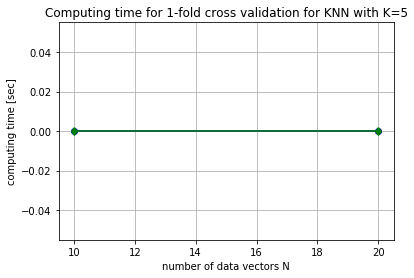

In [6]:
# (iv) plot results
f=plt.figure()
a = f.add_subplot(111)
a.plot(N_list,time_comp_naive,'bo-',N_list,time_comp_kdtree,'gd-')       # plot computing times 
a.set_xlabel('number of data vectors N');
a.set_ylabel('computing time [sec]');
a.set_title('Computing time for '+str(S)+'-fold cross validation for KNN with K='+str(K));
a.grid()

plt.show()